# Prototype Rest & Ref separation in Theano

In this first example, we will show how to construct a first basic model and the main objects and functions. First we import gempy:

In [1]:
# These two lines are necessary only if gempy is not installed
import sys, os
sys.path.append("../..")

# Importing gempy
import gempy as gp

# Embedding matplotlib figures into the notebooks
%matplotlib inline

# Aux imports
import numpy as np

../../gempy/bayesian/posterior_analysis.py:28: UserWarning: pymc (v3) package is not installed. No support for stochastic simulation posterior analysis.
  warnings.warn("pymc (v3) package is not installed. No support for stochastic simulation posterior analysis.")


All data get stored in a python object InputData.  This object can be easily stored in a Python pickle. However, these files have the limitation that all dependecies must have the same versions as those when the pickle were created. For these reason to have more stable tutorials we will generate the InputData from raw data---i.e. csv files exported from Geomodeller.

These csv files can be found in the input_data folder in the root folder of GemPy. These tables contains uniquely the XYZ (and poles, azimuth and polarity in the foliation case) as well as their respective formation name (but not necessary the formation order).


In [2]:
# Importing the data from csv files and settign extent and resolution
geo_data = gp.create_data([0,2000,0,2000,-2000,0],[ 60,60,60],
                         path_o = os.pardir+"/input_data/FabLessPoints_Foliations.csv",
                         path_i = os.pardir+"/input_data/FabLessPoints_Points.csv")

../../gempy/data_management.py:819: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  for i in self.interfaces["formation"]]
../../gempy/data_management.py:823: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  for i in self.orientations["formation"]]


In [3]:
geo_data.interfaces.tail()

,X,Y,Z,formation,series,formation_number,order_series,isFault,annotations,formation_value
14,900.0,1000.0,-650.0,SecondaryReservoir,Default series,5,1,False,"${\bf{x}}_{\alpha \,{\bf{5}},2}$",5
15,600.0,1000.0,-550.0,SecondaryReservoir,Default series,5,1,False,"${\bf{x}}_{\alpha \,{\bf{5}},3}$",5
16,1300.0,1000.0,-600.0,SecondaryReservoir,Default series,5,1,False,"${\bf{x}}_{\alpha \,{\bf{5}},4}$",5
18,1900.0,1000.0,-800.0,SecondaryReservoir,Default series,5,1,False,"${\bf{x}}_{\alpha \,{\bf{5}},5}$",5
39,0.0,0.0,-2000.0,basement,Default series,6,1,False,"${\bf{x}}_{\alpha \,{\bf{6}},0}$",6


In [4]:
# Assigning series to formations as well as their order (timewise)
gp.set_series(geo_data, {"fault":'MainFault', 
                      "Rest": ('SecondaryReservoir','Seal', 'Reservoir', 'Overlying'), 
                               },
                       order_series = ["fault", 'Rest'],
                       order_formations=['MainFault', 
                                         'SecondaryReservoir', 'Seal','Reservoir', 'Overlying',
                                         ]) 


../../gempy/data_management.py:819: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  for i in self.interfaces["formation"]]
../../gempy/data_management.py:823: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  for i in self.orientations["formation"]]


In [5]:
geo_data.interfaces.tail()

,X,Y,Z,formation,series,formation_number,order_series,isFault,annotations,formation_value
31,1600.0,1000.0,-1500.0,Overlying,Rest,5,2,False,"${\bf{x}}_{\alpha \,{\bf{5}},4}$",5
32,1750.0,1000.0,-1550.0,Overlying,Rest,5,2,False,"${\bf{x}}_{\alpha \,{\bf{5}},5}$",5
33,1000.0,1000.0,-1300.0,Overlying,Rest,5,2,False,"${\bf{x}}_{\alpha \,{\bf{5}},6}$",5
28,2000.0,1000.0,-1575.0,Overlying,Rest,5,2,False,"${\bf{x}}_{\alpha \,{\bf{5}},7}$",5
39,0.0,0.0,-2000.0,basement,Rest,6,2,False,"${\bf{x}}_{\alpha \,{\bf{6}},0}$",6


In [6]:
gp.get_series(geo_data)

,fault,Rest
0,MainFault,SecondaryReservoir
1,NaN,Seal
2,NaN,Reservoir
3,NaN,Overlying
4,NaN,basement


../../gempy/plotting/sequential_pile.py:136: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  pos_anch = np.squeeze(self.anch_series.as_matrix())
../../gempy/plotting/sequential_pile.py:156: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  pos_anch = np.squeeze(self.anch_formations.as_matrix())


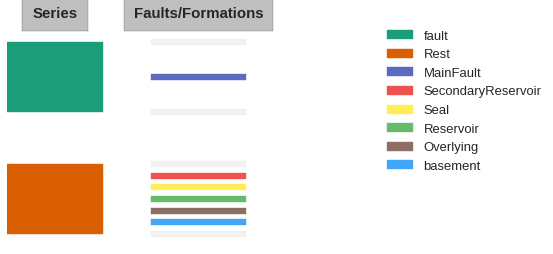

In [7]:
gp.get_sequential_pile(geo_data)

../../gempy/gempy_front.py:927: FutureWarning: gempy plotting functionality will be moved in version 1.2, use gempy.plotting module instead
  warnings.warn("gempy plotting functionality will be moved in version 1.2, use gempy.plotting module instead", FutureWarning)


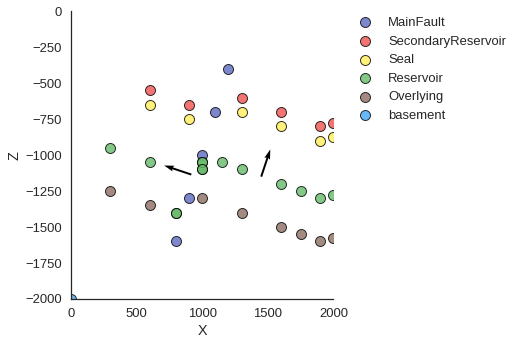

In [8]:
gp.plot_data(geo_data)

In [9]:
interp_data = gp.InterpolatorData(geo_data, compile_theano=True, u_grade=[0,1])

../../gempy/interpolator.py:203: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  [geo_data.orientations, geo_data.interfaces]).max()[['X', 'Y', 'Z']]
../../gempy/interpolator.py:205: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  [geo_data.orientations, geo_data.interfaces]).min()[['X', 'Y', 'Z']]
../../gempy/interpolator.py:240: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  geo_data_rescaled.extent = copy.copy(new_coord_extent.as_matrix())
../../gempy/interpolator.py:243: FutureWarning: Method .as_matrix will be removed in 

Compiling theano function...
Compilation Done!
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float32
Number of faults:  1


In [10]:
inter = interp_data.interpolator

## <a href='#summary'><span style="color:red">Jump to Theano Summary</span></a> 

## Ref & Res point separation in Pandas

In [11]:
inter.geo_data_res_no_basement.interfaces

,X,Y,Z,formation,series,formation_number,order_series,isFault,annotations,formation_value
0,0.5501,0.503225,0.70010,MainFault,fault,1,1,True,"${\bf{x}}_{\alpha \,{\bf{1}},0}$",1
1,0.5001,0.503225,0.55010,MainFault,fault,1,1,True,"${\bf{x}}_{\alpha \,{\bf{1}},1}$",1
2,0.4751,0.503225,0.47510,MainFault,fault,1,1,True,"${\bf{x}}_{\alpha \,{\bf{1}},2}$",1
3,0.5251,0.503225,0.62510,MainFault,fault,1,1,True,"${\bf{x}}_{\alpha \,{\bf{1}},3}$",1
4,0.4501,0.503225,0.40010,MainFault,fault,1,1,True,"${\bf{x}}_{\alpha \,{\bf{1}},4}$",1
5,0.7501,0.503225,0.60635,SecondaryReservoir,Rest,2,2,False,"${\bf{x}}_{\alpha \,{\bf{2}},0}$",2
6,0.6501,0.503225,0.62510,SecondaryReservoir,Rest,2,2,False,"${\bf{x}}_{\alpha \,{\bf{2}},1}$",2
7,0.4751,0.503225,0.63760,SecondaryReservoir,Rest,2,2,False,"${\bf{x}}_{\alpha \,{\bf{2}},2}$",2
8,0.4001,0.503225,0.66260,SecondaryReservoir,Rest,2,2,False,"${\bf{x}}_{\alpha \,{\bf{2}},3}$",2
9,0.5751,0.503225,0.65010,SecondaryReservoir,Rest,2,2,False,"${\bf{x}}_{\alpha \,{\bf{2}},4}$",2


In [35]:
# First: length of interface in principle could stay in python
inter.len_interfaces

array([ 5,  6,  6, 14,  8])

In [36]:
inter.set_length_interface??

In [37]:
# Second find the reference position

In [38]:
inter.ref_position

array([ 0,  5, 11, 17, 31])

In [41]:
import theano
a = theano.shared(inter.ref_position)

In [46]:
tt.concatenate((tt.stack(0) , a)).eval()

array([ 0,  0,  5, 11, 17, 31])

In [39]:
interp_data.interpolator.tg.npf.get_value()

array([ 0,  4,  9, 14, 27, 34], dtype=int32)

In [16]:
inter.set_ref_position??

In [17]:
# Third extract the values without the references

In [18]:
inter.pandas_rest_layer_points.head()

,X,Y,Z,formation,series,formation_number,order_series,isFault,annotations,formation_value
1,0.5001,0.503225,0.5501,MainFault,fault,1,1,True,"${\bf{x}}_{\alpha \,{\bf{1}},1}$",1
2,0.4751,0.503225,0.4751,MainFault,fault,1,1,True,"${\bf{x}}_{\alpha \,{\bf{1}},2}$",1
3,0.5251,0.503225,0.6251,MainFault,fault,1,1,True,"${\bf{x}}_{\alpha \,{\bf{1}},3}$",1
4,0.4501,0.503225,0.4001,MainFault,fault,1,1,True,"${\bf{x}}_{\alpha \,{\bf{1}},4}$",1
6,0.6501,0.503225,0.6251,SecondaryReservoir,Rest,2,2,False,"${\bf{x}}_{\alpha \,{\bf{2}},1}$",2


In [19]:
inter.set_layers_rest??

In [20]:
# Forth extract the ref and append as many times as lenth of interce. This is the fucked up one

In [21]:
inter.pandas_ref_layer_points

,X,Y,Z,formation,series,formation_number,order_series,isFault,annotations,formation_value
0,0.5501,0.503225,0.70010,MainFault,fault,1,1,True,"${\bf{x}}_{\alpha \,{\bf{1}},0}$",1
5,0.7501,0.503225,0.60635,SecondaryReservoir,Rest,2,2,False,"${\bf{x}}_{\alpha \,{\bf{2}},0}$",2
11,0.4001,0.503225,0.63760,Seal,Rest,3,2,False,"${\bf{x}}_{\alpha \,{\bf{3}},0}$",3
17,0.4501,0.703225,0.45010,Reservoir,Rest,4,2,False,"${\bf{x}}_{\alpha \,{\bf{4}},0}$",4
31,0.4001,0.503225,0.46260,Overlying,Rest,5,2,False,"${\bf{x}}_{\alpha \,{\bf{5}},0}$",5


In [22]:
inter.pandas_ref_layer_points_rep

,X,Y,Z,formation,series,formation_number,order_series,isFault,annotations,formation_value
0,0.5501,0.503225,0.70010,MainFault,fault,1,1,True,"${\bf{x}}_{\alpha \,{\bf{1}},0}$",1
0,0.5501,0.503225,0.70010,MainFault,fault,1,1,True,"${\bf{x}}_{\alpha \,{\bf{1}},0}$",1
0,0.5501,0.503225,0.70010,MainFault,fault,1,1,True,"${\bf{x}}_{\alpha \,{\bf{1}},0}$",1
0,0.5501,0.503225,0.70010,MainFault,fault,1,1,True,"${\bf{x}}_{\alpha \,{\bf{1}},0}$",1
5,0.7501,0.503225,0.60635,SecondaryReservoir,Rest,2,2,False,"${\bf{x}}_{\alpha \,{\bf{2}},0}$",2
5,0.7501,0.503225,0.60635,SecondaryReservoir,Rest,2,2,False,"${\bf{x}}_{\alpha \,{\bf{2}},0}$",2
5,0.7501,0.503225,0.60635,SecondaryReservoir,Rest,2,2,False,"${\bf{x}}_{\alpha \,{\bf{2}},0}$",2
5,0.7501,0.503225,0.60635,SecondaryReservoir,Rest,2,2,False,"${\bf{x}}_{\alpha \,{\bf{2}},0}$",2
5,0.7501,0.503225,0.60635,SecondaryReservoir,Rest,2,2,False,"${\bf{x}}_{\alpha \,{\bf{2}},0}$",2
11,0.4001,0.503225,0.63760,Seal,Rest,3,2,False,"${\bf{x}}_{\alpha \,{\bf{3}},0}$",3


In [23]:
inter.set_layers_ref??

<a id='summary'></a>

## Ref & Res point separation in  Theano

In [24]:
import theano as t
import theano.tensor as tt

It is not necessary to create shared Theano variables of `inter.ref_position` and `inter.len_interfaces`, because Theano accepts numpy arrays for slicing and parameters!

In [25]:
# instantiate Theano tensors

points = tt.dmatrix('points') # float64
#ref_points_ind = tt.dmatrix('ref_points')
ref_points = tt.dmatrix('ref_points')
res_points = tt.dmatrix('res_points')

In [26]:
# create expression/graph for slicing and repeating ref and slicing res

# individual ref points
#ref_points_ind = points[inter.ref_position
#ref_points = tt.repeat(ref_points_ind, (inter.len_interfaces - 1), axis=0)

ref_points = tt.repeat(points[inter.ref_position], (inter.len_interfaces - 1), axis=0)

# mask inverse of ref points in numpy
res_mask = np.ones(inter.geo_data_res_no_basement.interfaces[['X','Y','Z']].values.shape[0], dtype=bool)
res_mask[inter.ref_position] = 0
print(res_mask)
res_points = points[res_mask]

[False  True  True  True  True False  True  True  True  True  True False
  True  True  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True  True  True
  True  True  True]


In [27]:
# create theano separation function

sep_ref_res = t.function([points], [ref_points, res_points])

In [28]:
# calculate res and ref points

ref, res = sep_ref_res(inter.geo_data_res_no_basement.interfaces[['X','Y','Z']].values)

In [29]:
res

array([[0.5001  , 0.503225, 0.5501  ],
       [0.4751  , 0.503225, 0.4751  ],
       [0.5251  , 0.503225, 0.6251  ],
       [0.4501  , 0.503225, 0.4001  ],
       [0.6501  , 0.503225, 0.6251  ],
       [0.4751  , 0.503225, 0.6376  ],
       [0.4001  , 0.503225, 0.6626  ],
       [0.5751  , 0.503225, 0.6501  ],
       [0.7251  , 0.503225, 0.6001  ],
       [0.5751  , 0.503225, 0.6251  ],
       [0.6501  , 0.503225, 0.6001  ],
       [0.7501  , 0.503225, 0.58135 ],
       [0.7251  , 0.503225, 0.5751  ],
       [0.4751  , 0.503225, 0.6126  ],
       [0.4001  , 0.503225, 0.5376  ],
       [0.3251  , 0.503225, 0.5626  ],
       [0.6876  , 0.503225, 0.4876  ],
       [0.4501  , 0.303225, 0.4501  ],
       [0.5751  , 0.503225, 0.5251  ],
       [0.7251  , 0.503225, 0.4751  ],
       [0.5376  , 0.503225, 0.5376  ],
       [0.5001  , 0.259475, 0.5376  ],
       [0.5001  , 0.278225, 0.5251  ],
       [0.5001  , 0.746975, 0.5376  ],
       [0.5001  , 0.728225, 0.5251  ],
       [0.6501  , 0.50322

In [30]:
ref

array([[0.5501  , 0.503225, 0.7001  ],
       [0.5501  , 0.503225, 0.7001  ],
       [0.5501  , 0.503225, 0.7001  ],
       [0.5501  , 0.503225, 0.7001  ],
       [0.7501  , 0.503225, 0.60635 ],
       [0.7501  , 0.503225, 0.60635 ],
       [0.7501  , 0.503225, 0.60635 ],
       [0.7501  , 0.503225, 0.60635 ],
       [0.7501  , 0.503225, 0.60635 ],
       [0.4001  , 0.503225, 0.6376  ],
       [0.4001  , 0.503225, 0.6376  ],
       [0.4001  , 0.503225, 0.6376  ],
       [0.4001  , 0.503225, 0.6376  ],
       [0.4001  , 0.503225, 0.6376  ],
       [0.4501  , 0.703225, 0.4501  ],
       [0.4501  , 0.703225, 0.4501  ],
       [0.4501  , 0.703225, 0.4501  ],
       [0.4501  , 0.703225, 0.4501  ],
       [0.4501  , 0.703225, 0.4501  ],
       [0.4501  , 0.703225, 0.4501  ],
       [0.4501  , 0.703225, 0.4501  ],
       [0.4501  , 0.703225, 0.4501  ],
       [0.4501  , 0.703225, 0.4501  ],
       [0.4501  , 0.703225, 0.4501  ],
       [0.4501  , 0.703225, 0.4501  ],
       [0.4501  , 0.70322

## Compare Pandas and Theano results

In [31]:
# check ref points match
np.prod(ref == inter.pandas_ref_layer_points_rep.loc[:,['X','Y','Z']].values)

1

In [32]:
# check res points match
np.prod(res == inter.pandas_rest_layer_points.loc[:,['X','Y','Z']].values)

1

In [33]:
geo_data.interfaces._data.as_matrix??

Object `geo_data.interfaces._data.as_matrix` not found.


In [34]:
a = geo_data.interfaces.as_matrix??
a[0,0] = 2

NameError: name 'a' is not defined

In [ ]:
a = geo_data.interfaces.as_matrix

In [ ]:
a = geo_data.interfaces.as_matrix

In [ ]:
a = geo_data.interfaces.values

In [ ]:
a = geo_data.interfaces.as_matrix

In [ ]:
a = geo_data.interfaces.get_values

In [ ]:
a = geo_data.interfaces[['X', 'Y', 'Z']].get_values

In [ ]:
import pandas as pn
a = pn.DataFrame(np.random.rand(20000,20))

In [ ]:
%%timeit
a.iat[5,5] = 10
a.sort_values(by=[10])
a.iloc[:, :5].as_matrix()

In [ ]:
geo_data.interfaces[['X', 'Y', 'Z']].as_matrix